In [47]:

#Reading the data set and taking only 2 classes
import pandas as pd 
import numpy as np

dataset = pd.read_csv('irisdata.csv',header=None)

dataset = dataset[dataset[4] != 'Iris-versicolor']
dataset[4] = dataset[4].str.replace('Iris-setosa','1')
dataset[4] = dataset[4].str.replace('Iris-virginica','0')
dataset = dataset.astype('int64')
dataset = np.array(dataset)


In [10]:
from math import exp
from random import seed
from random import random


# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 



In [11]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
 


In [40]:
# Train a network for a fixed number of epochs
t_error = np.zeros(100)
def train_network(network, train, l_rate, n_epoch, n_outputs):
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        t_error[epoch] = sum_error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        

In [41]:
# Test training backprop algorithm
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 100, n_outputs)
for layer in network:
    print(layer)


>epoch=0, lrate=0.500, error=28.234
>epoch=1, lrate=0.500, error=33.904
>epoch=2, lrate=0.500, error=34.101
>epoch=3, lrate=0.500, error=32.683
>epoch=4, lrate=0.500, error=21.690
>epoch=5, lrate=0.500, error=12.362
>epoch=6, lrate=0.500, error=7.579
>epoch=7, lrate=0.500, error=5.276
>epoch=8, lrate=0.500, error=3.919
>epoch=9, lrate=0.500, error=3.044
>epoch=10, lrate=0.500, error=2.453
>epoch=11, lrate=0.500, error=2.034
>epoch=12, lrate=0.500, error=1.727
>epoch=13, lrate=0.500, error=1.495
>epoch=14, lrate=0.500, error=1.315
>epoch=15, lrate=0.500, error=1.171
>epoch=16, lrate=0.500, error=1.055
>epoch=17, lrate=0.500, error=0.958
>epoch=18, lrate=0.500, error=0.877
>epoch=19, lrate=0.500, error=0.809
>epoch=20, lrate=0.500, error=0.750
>epoch=21, lrate=0.500, error=0.698
>epoch=22, lrate=0.500, error=0.654
>epoch=23, lrate=0.500, error=0.614
>epoch=24, lrate=0.500, error=0.579
>epoch=25, lrate=0.500, error=0.547
>epoch=26, lrate=0.500, error=0.519
>epoch=27, lrate=0.500, error=0.

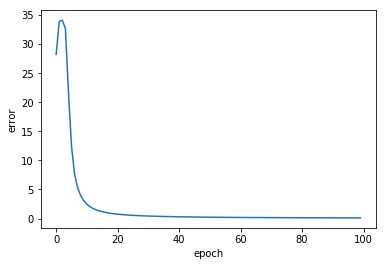

In [45]:
import matplotlib.pyplot as plt

plt.plot(t_error)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()